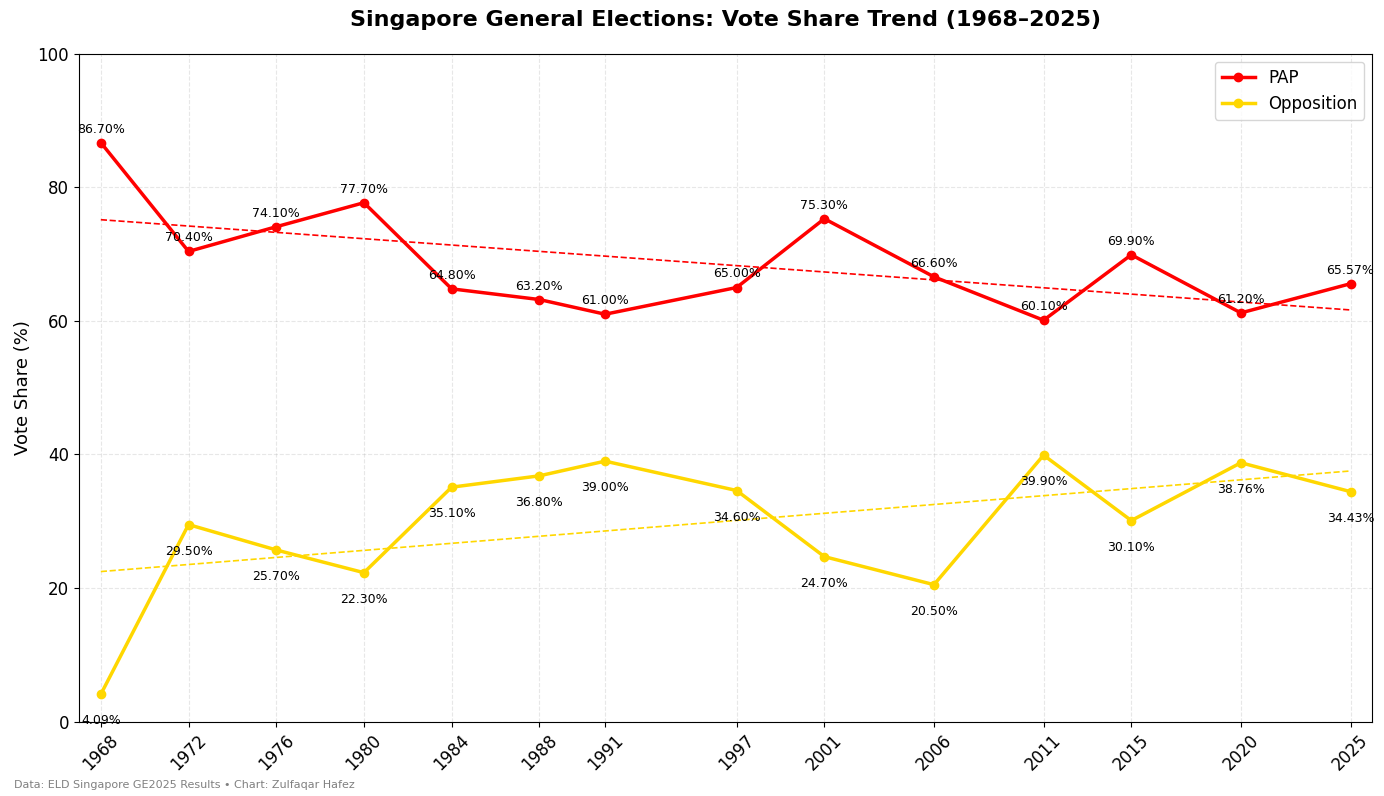

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Election years and vote shares
years = [1968, 1972, 1976, 1980, 1984, 1988, 1991, 1997, 2001, 2006, 2011, 2015, 2020, 2025]
pap_votes = [86.7, 70.4, 74.1, 77.7, 64.8, 63.2, 61.0, 65.0, 75.3, 66.6, 60.1, 69.9, 61.2, 65.57]
opp_votes = [4.09, 29.5, 25.7, 22.3, 35.1, 36.8, 39.0, 34.6, 24.7, 20.5, 39.9, 30.1, 38.76, 34.43]

# Set up figure
plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 12})

# Plot lines
plt.plot(years, pap_votes, marker='o', label='PAP', color='red', linewidth=2.5)
plt.plot(years, opp_votes, marker='o', label='Opposition', color='gold', linewidth=2.5)

# Add data labels
for i in range(len(years)):
    plt.text(years[i], pap_votes[i] + 1.5, f"{pap_votes[i]:.2f}%", ha='center', fontsize=9, color='black')
    plt.text(years[i], opp_votes[i] - 4.5, f"{opp_votes[i]:.2f}%", ha='center', fontsize=9, color='black')

# Trend lines
z_pap = np.polyfit(years, pap_votes, 1)
p_pap = np.poly1d(z_pap)
plt.plot(years, p_pap(years), linestyle='--', color='red', linewidth=1.2)

z_opp = np.polyfit(years, opp_votes, 1)
p_opp = np.poly1d(z_opp)
plt.plot(years, p_opp(years), linestyle='--', color='gold', linewidth=1.2)

# Style and axis formatting
plt.title("Singapore General Elections: Vote Share Trend (1968–2025)", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Vote Share (%)", fontsize=13)
plt.xticks(years, rotation=45)
plt.ylim(0, 100)
plt.xlim(min(years) - 1, max(years) + 1)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.annotate("Data: ELD Singapore GE2025 Results • Chart: Zulfaqar Hafez",
             xy=(0.01, 0.01), xycoords='figure fraction',
             fontsize=8, ha='left', color='gray')
# Show chart
plt.show()


<ipython-input-59-b480f40418fc>:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


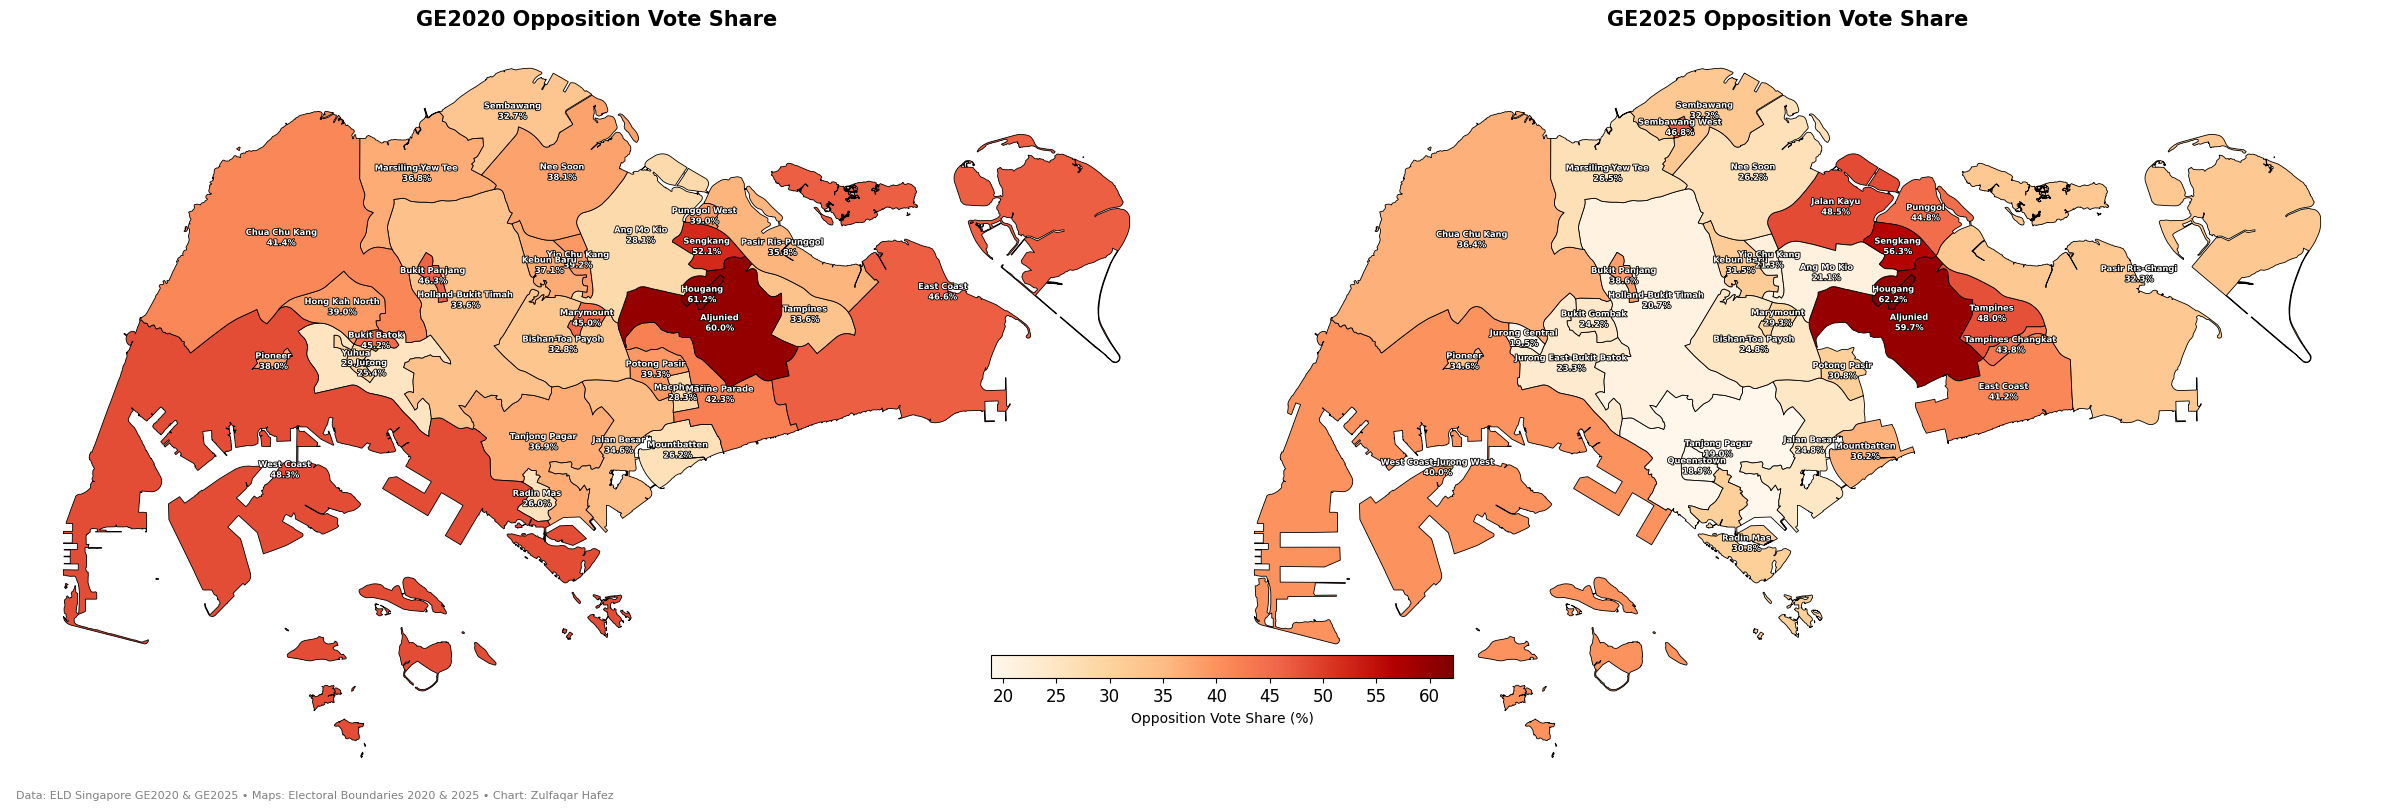

In [59]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from shapely import wkt

# Load and prepare data
gdf_2020 = gpd.read_file("ElectoralBoundary2020GEOJSON.geojson")
gdf_2020["geometry"] = gdf_2020["geometry"].apply(lambda geom: wkt.loads(geom.wkt))
votes_2020 = pd.read_csv("GE2020_VoteShare.csv")

gdf_2025 = gpd.read_file("Electoral_Boundary_2025.geojson")
gdf_2025["geometry"] = gdf_2025["geometry"].apply(lambda geom: wkt.loads(geom.wkt))
votes_2025 = pd.read_csv("GE2025_VoteShare.csv")

# Clean and merge
gdf_2020["Name"] = gdf_2020["Name"].str.upper().str.strip()
votes_2020["Constituency"] = votes_2020["Constituency"].str.upper().str.strip()
merged_2020 = gdf_2020.merge(votes_2020, left_on="Name", right_on="Constituency")

gdf_2025["Name"] = gdf_2025["Name"].str.upper().str.strip()
votes_2025["Constituency"] = votes_2025["Constituency"].str.upper().str.strip()
merged_2025 = gdf_2025.merge(votes_2025, left_on="Name", right_on="Constituency")

# Plotting setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

# Shared color scale
vmin = min(merged_2020["OPP_2020"].min(), merged_2025["OPP_2025"].min())
vmax = max(merged_2020["OPP_2020"].max(), merged_2025["OPP_2025"].max())

def plot_map(ax, df, col, title):
    df.plot(column=col, cmap="OrRd", linewidth=0.6, edgecolor='black',
            vmin=vmin, vmax=vmax, ax=ax, legend=False)

    for _, row in df.iterrows():
        if row.geometry.centroid.is_empty:
            continue
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        label = f"{row['Name'].title()}\n{row[col]:.1f}%"
        txt = ax.text(x, y, label, ha='center', va='center',
                      fontsize=6, color='white', fontweight='bold')
        txt.set_path_effects([
            path_effects.Stroke(linewidth=1.2, foreground='black'),
            path_effects.Normal()
        ])
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.axis("off")

# Render both maps
plot_map(ax1, merged_2020, "OPP_2020", "GE2020 Opposition Vote Share")
plot_map(ax2, merged_2025, "OPP_2025", "GE2025 Opposition Vote Share")

# Shared horizontal colorbar
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='horizontal', fraction=0.025, pad=0.03)
cbar.set_label("Opposition Vote Share (%)", fontsize=10)

# Source
fig.text(0.01, 0.01,
         "Data: ELD Singapore GE2020 & GE2025 • Maps: Electoral Boundaries 2020 & 2025 • Chart: Zulfaqar Hafez",
         fontsize=8, ha='left', color='gray')

plt.tight_layout()
plt.show()

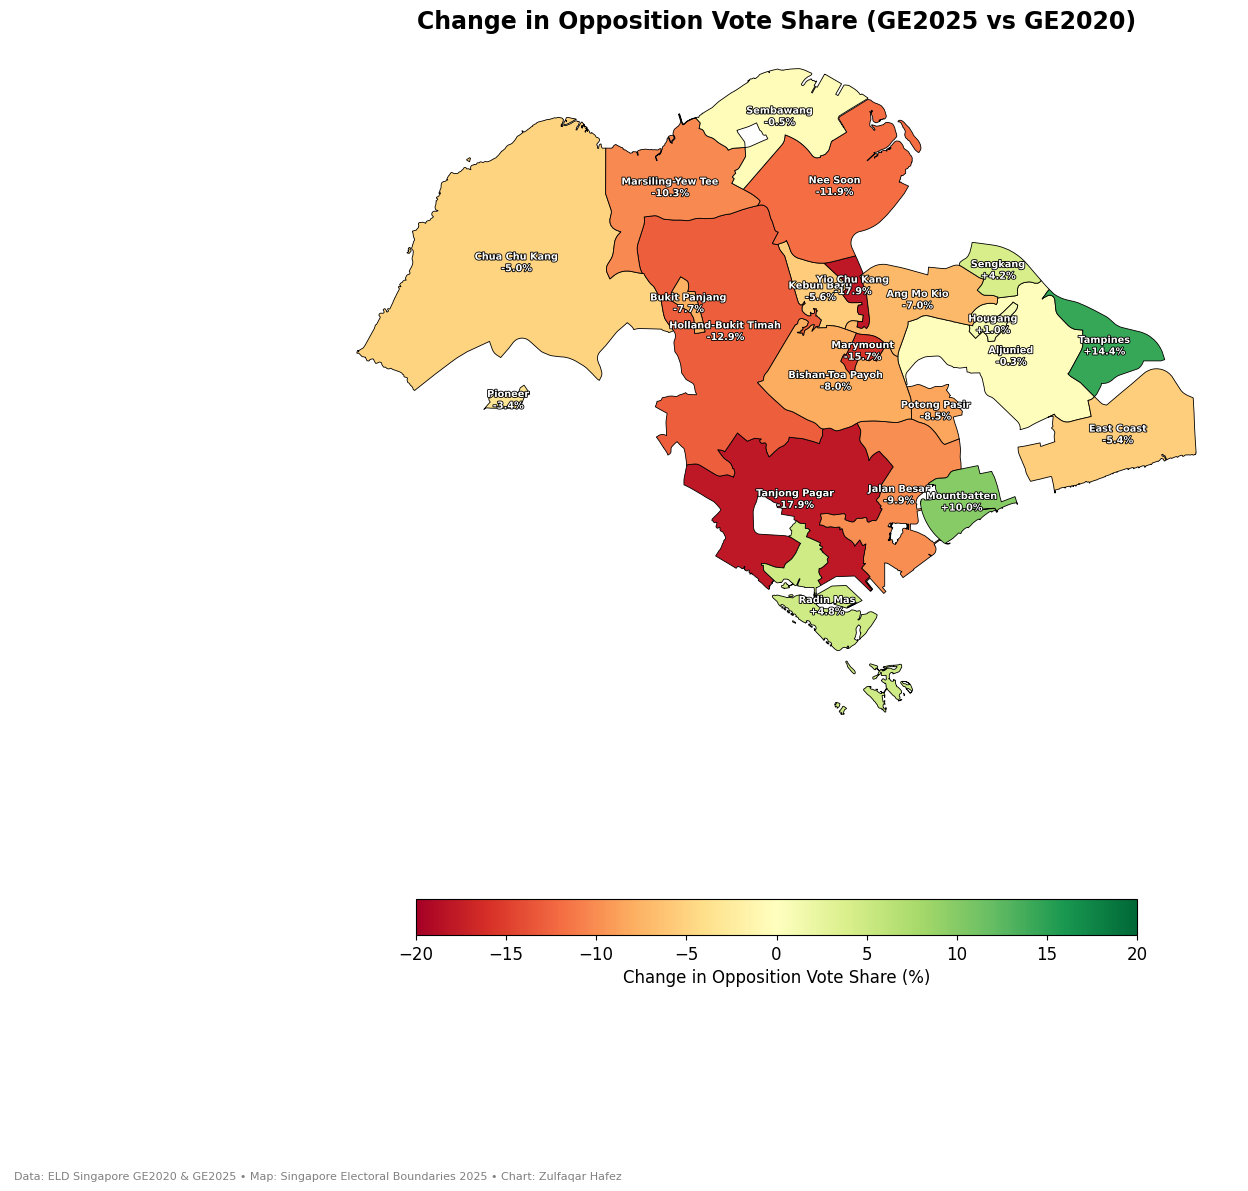

In [58]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# === Load shapefiles and data ===
gdf_2020 = gpd.read_file("ElectoralBoundary2020GEOJSON.geojson")
votes_2020 = pd.read_csv("GE2020_VoteShare.csv")

gdf_2025 = gpd.read_file("Electoral_Boundary_2025.geojson")
votes_2025 = pd.read_csv("GE2025_VoteShare.csv")

# === Standardize names ===
gdf_2020["Name"] = gdf_2020["Name"].str.upper().str.strip()
votes_2020["Constituency"] = votes_2020["Constituency"].str.upper().str.strip()
merged_2020 = gdf_2020.merge(votes_2020, left_on="Name", right_on="Constituency")

gdf_2025["Name"] = gdf_2025["Name"].str.upper().str.strip()
votes_2025["Constituency"] = votes_2025["Constituency"].str.upper().str.strip()
merged_2025 = gdf_2025.merge(votes_2025, left_on="Name", right_on="Constituency")

# === Compute difference between 2025 and 2020 ===
common = pd.merge(
    merged_2020[['Name', 'OPP_2020']],
    merged_2025[['Name', 'OPP_2025']],
    on='Name'
)
common["DIFF"] = common["OPP_2025"] - common["OPP_2020"]

# === Merge with 2025 geometries ===
diff_map = merged_2025.merge(common[['Name', 'DIFF']], on='Name')

# === Plot ===
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
vmin, vmax = -20, 20
cmap = 'RdYlGn'  # Red = decreased opposition, Green = increased

# Plot map
diff_map.plot(
    column="DIFF", cmap=cmap, edgecolor="black", linewidth=0.6,
    legend=True, vmin=vmin, vmax=vmax, ax=ax,
    legend_kwds={
        'orientation': 'horizontal',
        'shrink': 0.6,
        'label': 'Change in Opposition Vote Share (%)'
    }
)

# Annotate each constituency
for _, row in diff_map.iterrows():
    if row.geometry.centroid.is_empty:
        continue
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = f"{row['Name'].title()}\n{row['DIFF']:+.1f}%"
    txt = ax.text(x, y, label, ha='center', va='center', fontsize=7,
                  color='white', fontweight='bold')
    txt.set_path_effects([
        path_effects.Stroke(linewidth=1.2, foreground='black'),
        path_effects.Normal()
    ])

# Final touches
ax.set_title("Change in Opposition Vote Share (GE2025 vs GE2020)", fontsize=17, weight='bold')
ax.axis("off")
plt.annotate(
    "Data: ELD Singapore GE2020 & GE2025 • Map: Singapore Electoral Boundaries 2025 • Chart: Zulfaqar Hafez",
    xy=(0.01, 0.01), xycoords='figure fraction',
    fontsize=8, ha='left', color='gray'
)

plt.tight_layout()
plt.show()
